#### EDA and Pre processing (Before Annotation)

##### in this notebook i will do the following:
- Check number of PDFs and pages extracted.
- Visualize random samples to assess quality.

##### Imports libraries

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

##### Folder of images folders

In [15]:
IMG_DIR = "../Data/images"

In [16]:
import os
print(os.path.exists(IMG_DIR))

True


In [17]:
companies = [d for d in os.listdir(IMG_DIR) if os.path.isdir(os.path.join(IMG_DIR, d))]
print(f" Total PDFs: {len(companies)}")

total_pages = 0 # here for total number of pages
pages_per_company = {}

for company in companies:
    pages = [f for f in os.listdir(os.path.join(IMG_DIR, company)) if f.endswith(".png")]
    pages_per_company[company] = len(pages)
    total_pages += len(pages)

print(f"Total extracted pages: {total_pages}")
for k,v in pages_per_company.items():
    print(f"{k}: {v} pages")

 Total PDFs: 30
Total extracted pages: 1179
FS1: 33 pages
FS10: 37 pages
FS11: 26 pages
FS12: 64 pages
FS13: 39 pages
FS14: 40 pages
FS15: 34 pages
FS16: 57 pages
FS17: 33 pages
FS18: 36 pages
FS19: 55 pages
FS2: 41 pages
FS20: 40 pages
FS21: 44 pages
FS22: 60 pages
FS3: 33 pages
FS4: 28 pages
FS5: 39 pages
FS6: 52 pages
FS7: 30 pages
FS8: 45 pages
FS9: 33 pages
RSF1: 31 pages
RSF2: 33 pages
RSF3: 34 pages
RSF4: 35 pages
RSF5: 35 pages
RSF6: 32 pages
RSF7: 38 pages
RSF8: 42 pages


##### Quick visual check to make sure the conversion from PDF to image succeeded

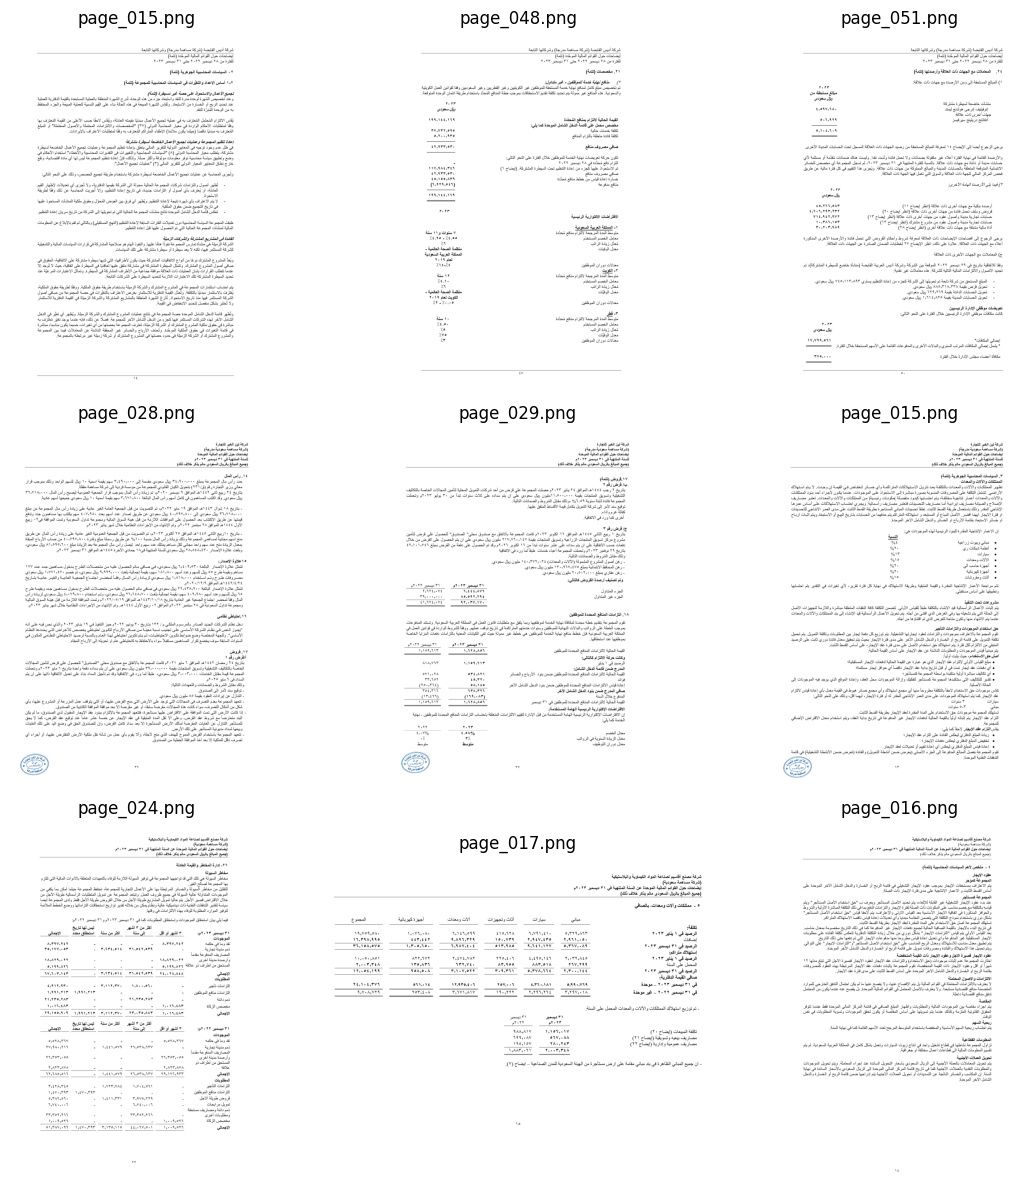

In [20]:
sample_imgs = []
for company in random.sample(companies, min(3, len(companies))):
    company_path = os.path.join(IMG_DIR, company)
    pages = [p for p in os.listdir(company_path) if p.endswith(".png")]
    for p in random.sample(pages, min(3, len(pages))):
        sample_imgs.append(os.path.join(company_path, p))

plt.figure(figsize=(12, 12)) 
for i, path in enumerate(sample_imgs, 1):
    img = Image.open(path)
    plt.subplot(3, 3, i)  
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(path))
plt.tight_layout()
plt.show()

#####  Key findings :

The initial EDA revealed that the extracted dataset contains multiple PDF sources with a wide range of page sizes and resolutions. On average, pages measured around 2553×3384 px, and there were 48 unique size variants, indicating multiple formatting across documents. 